In [7]:
import pandas as pd
import re
import seaborn as sns
import nltk
import textblob
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word



In [8]:
data = pd.read_csv("dataset.csv", delimiter=";",usecols=["star_rating", "review_body"])
data.head()

,star_rating,review_body
0,4,So far so good
1,3,Needs a little more work.....
2,1,Please cancel.
3,5,Works as Expected!
4,4,I've had Webroot for a few years. It expired a...


In [6]:
data.shape

(102084, 15)

<Axes: xlabel='star_rating', ylabel='count'>

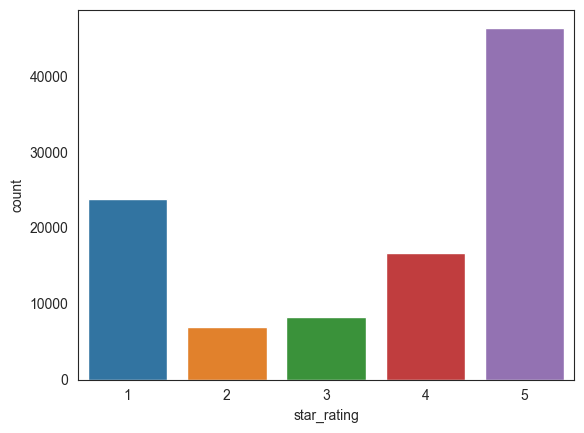

In [10]:
data['sentiment'] = data['star_rating'].map({1.0:'Very Negative', 2.0:'Somewhat Negative',
                                     3.0: 'Neutral',4.0:'Somewhat Positive',
                                     5.0:'Very Positive'})

                                    
import seaborn as sns
sns.set_style("white")
sns.countplot(x ='star_rating', data = data)                    

In [12]:
data.head()

,star_rating,review_body,sentiment
0,4,So far so good,Somewhat Positive
1,3,Needs a little more work.....,Neutral
2,1,Please cancel.,Very Negative
3,5,Works as Expected!,Very Positive
4,4,I've had Webroot for a few years. It expired a...,Somewhat Positive


In [17]:
data[data["star_rating"]== 1]

,star_rating,review_body,sentiment
2,1,Please cancel.,Very Negative
6,1,The variations created by Win10 induced this p...,Very Negative
7,1,Horrible! Would not upgrade previous version ...,Very Negative
8,1,Waste of time .,Very Negative
11,1,Will not open on my window 8. boooo,Very Negative
...,...,...,...
102068,1,Hello! The file can not be unpacked. I've trye...,Very Negative
102069,1,Installed Turbotax Premier on new Dell Latitud...,Very Negative
102074,1,While the software in the box will work for Ma...,Very Negative
102076,1,The Amazon Downloader doesn't work for this pr...,Very Negative


In [3]:
#data frame 1 den başlattık.
data.index = range(1, len(data)+1)
data.head()


,yorum
1,beklentimin altında bir ürün kaliteli değil
2,3. kademe hız da motor titreme yapıyor.bu sebe...
3,başlığı sabit durmuyor. arka koruma demiri üfl...
4,ürün gayet kalitesiz öğrenci evinde aldığımız ...
5,yuksek hizda kullanirken titredim yaptigi icin...


Metin Önişleme


In [4]:
df = data.copy()

In [5]:
df["yorum"] = df["yorum"].astype(str)

Küçük Harf Dönüşümü

In [6]:
df["yorum"].apply(lambda x: " ".join(x.lower() for x in x.split()))


1              beklentimin altında bir ürün kaliteli değil
2        3. kademe hız da motor titreme yapıyor.bu sebe...
3        başlığı sabit durmuyor. arka koruma demiri üfl...
4        ürün gayet kalitesiz öğrenci evinde aldığımız ...
5        yuksek hizda kullanirken titredim yaptigi icin...
                               ...                        
29776    i̇ki günde elime ulaştı, siteye teşekkür ederi...
29777    urun cok guzel, cok begendim kesinlikle tavsiy...
29778    space ve enter turşları dahil çok sessiz sadec...
29779    burdaki yorumları okuyarak aldım gayet kalitel...
29780    - sakal başlığı bende bir süre sonra gevşedi, ...
Name: yorum, Length: 29780, dtype: object

Noktalama İşaretlerinin Silinmesi

In [7]:
df["yorum"] = df["yorum"].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [8]:
df

,yorum
1,beklentimin altında bir ürün kaliteli değil
2,3 kademe hız da motor titreme yapıyorbu sebebt...
3,başlığı sabit durmuyor arka koruma demiri üfle...
4,ürün gayet kalitesiz öğrenci evinde aldığımız ...
5,yuksek hizda kullanirken titredim yaptigi icin...
...,...
29776,i̇ki günde elime ulaştı siteye teşekkür ederim...
29777,urun cok guzel cok begendim kesinlikle tavsiye...
29778,space ve enter turşları dahil çok sessiz sadec...
29779,burdaki yorumları okuyarak aldım gayet kalitel...


Sayıların Temizlenmesi

In [9]:
df['yorum'] = df['yorum'].apply(lambda x: re.sub(r'\d+', '', x))

In [10]:
df['yorum'][64]

'prima da sızdırırsa artık ne alacaz bilemedim   paket aldık bi de '

Fazla Boşlukların Silinmesi

In [11]:
df['yorum'] = df['yorum'].apply(lambda x: " ".join(x.split()))


In [12]:
df['yorum'][64]

'prima da sızdırırsa artık ne alacaz bilemedim paket aldık bi de'

Stopwordslerin Temizlenmesi

In [13]:
sw = set(stopwords.words('turkish'))
sw.add('cok')
sw

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'cok',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}

In [14]:
df["yorum"] = df["yorum"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [15]:
df["yorum"][98]

'uzun suredir kullaniyorum yenilenen paket berbat kotu sabah ust degistiriyoruz ortasindan on kismindan surekli sizdiriyo saat degil saat bile kuru kalmiyo alacak olanlara kesinlikle tavsiye etmiyorum umarim prima urunlerini toplatir'

In [16]:
mdf = df.copy()

Tokenization

In [17]:
TextBlob(mdf["yorum"][64]).words

WordList(['prima', 'sızdırırsa', 'artık', 'alacaz', 'bilemedim', 'paket', 'aldık', 'bi'])

In [18]:
mdf["yorum"].apply(lambda x: TextBlob(x).words)

1        [beklentimin, altında, bir, ürün, kaliteli, de...
2        [kademe, hız, motor, titreme, yapıyorbu, sebeb...
3        [başlığı, sabit, durmuyor, arka, koruma, demir...
4        [ürün, gayet, kalitesiz, öğrenci, evinde, aldı...
5        [yuksek, hizda, kullanirken, titredim, yaptigi...
                               ...                        
29776    [i̇ki, günde, elime, ulaştı, siteye, teşekkür,...
29777    [urun, guzel, begendim, kesinlikle, tavsiye, e...
29778    [space, enter, turşları, dahil, sessiz, sadece...
29779    [burdaki, yorumları, okuyarak, aldım, gayet, k...
29780    [sakal, başlığı, bende, bir, süre, sonra, gevş...
Name: yorum, Length: 29780, dtype: object

In [19]:
mdf["yorum"][8]

'bi makinadan ancak kadar ses çıkabilir ağaç motoru ses çıkartır'

In [20]:
deneme1 = mdf.copy()

Lemmatization

In [73]:
import pandas as pd
import spacy

In [75]:
nlp = spacy.load('en_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)
    lemma_list = [token.lemma_ for token in doc]
    return " ".join(lemma_list)

deneme1['yorum'] = deneme1['yorum'].apply(lemmatize_text)


OSError: [E050] Can't find model 'en_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.